<a href="https://colab.research.google.com/github/tritus-soi/Coursera_Capstone/blob/master/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project — The Battle of Neighborhoods in Bangkok : Som Tum Restaurant

As a part of the IBM Data Science Professional Certificate, you will find in this post an overview of my final capstone project.
As prepared for the assignment, I go through the problem description, data preparation and final analysis section step by step. Detailed code are given in Github and link can be found at the end of the post.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/%E0%B8%95%E0%B8%B3%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%84%E0%B8%82%E0%B9%88%E0%B9%80%E0%B8%84%E0%B9%87%E0%B8%A1_%E0%B8%AA%E0%B9%89%E0%B8%A1%E0%B8%95%E0%B8%B3_%E0%B8%95%E0%B8%B3%E0%B8%96%E0%B8%B2%E0%B8%94_Tumtaad_%E0%B8%81%E0%B8%A3%E0%B8%B0%E0%B8%9A%E0%B8%B5%E0%B9%88_01.jpg/1024px-%E0%B8%95%E0%B8%B3%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%84%E0%B8%82%E0%B9%88%E0%B9%80%E0%B8%84%E0%B9%87%E0%B8%A1_%E0%B8%AA%E0%B9%89%E0%B8%A1%E0%B8%95%E0%B8%B3_%E0%B8%95%E0%B8%B3%E0%B8%96%E0%B8%B2%E0%B8%94_Tumtaad_%E0%B8%81%E0%B8%A3%E0%B8%B0%E0%B8%9A%E0%B8%B5%E0%B9%88_01.jpg"></center>

### Table of Contents

1.   Introduction
2.   Target Audience
3.   Data Overview
4.   Methodology
5.   Discussion
6.   Conclusion


## 1. Introduction

**Som Tum **(Green papaya salad) is a spicy salad made from shredded unripe papaya. Originating from ethnic Lao people, it is also eaten throughout Southeast Asia. Locally known in Thailand as Som Tum (Thai: ส้มตำ, pronounced [sôm tām]), in Laos as tam som (Lao: ຕໍາສົ້ມ), or the more specific name tam maak hoong (Lao: ຕໍາໝາກຫຸ່ງ, pronounced [tàm.ma᷆ːk.hūŋ]), in Cambodia as bok l'hong (Khmer: បុកល្ហុង, pronounced [ɓok lhoŋ]), and in Vietnam as gỏi đu đủ.

Som Tum, the Thai variation, was listed at number 46 on World's 50 most delicious foods compiled by CNN Go in 2011[1] and 2018.



### 1.1 Description of the problem and business understanding

This final project explores the best locations for Som Tum restaurants throughout Bangkok. 

Bangkok Thailand's capital of Bangkok was named the most visited city in the world, according to MasterCard. Following Bangkok, Paris (19.10 million) came as a close second, with London (19.01 million), Dubai (15.93 million) and Singapore (14.67 million) rounding out the top five most visited cities in the world in 2018. 

This city is a famous place in the world. They are diverse in many ways multicultural as well as the financial hubs of countries. 

Som Tum is the Isaan (Northeastern) Thai dishes you should try. I need to find and enjoy Som Tum and other Isaan food. This report explores which neighborhoods and districts of Bangkok have the most as well as the best Som Tum restaurants. 

Additionally, I will attempt to answer the questions “Where should I open a Som Tum restaurant?” and “Where should I stay If I want great Isaan food?”

The objective of this project is to use Foursquare location data and regional clustering of venue information to determine what might be the ‘best’ neighborhood in  Bangkok to open a restaurant. Som Tum and Isaan food are one of the most bought dishes in Bangkok.
 
Som Tum originating from Northeastern. Bangkok's population of over 8 million that migrated from around the country, there are numerous opportunities to open a new Som Tum restaurant. Through this project, I will find the most suitable location for an entrepreneur to open a new Som Tum and Isaan restaurant in Bangkok.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Bangkok_Montage.png/800px-Bangkok_Montage.png"</center>

# 2. Target Audience.

This project is aimed towards Entrepreneurs or Business owners who want to open a new Som Tum and Isaan Restaurant or grow their current business. The analysis will provide vital information that can be used by the target audience.

### 2.1 Success Criteria

The success criteria of the project will be a good recommendation for a neighborhood choice to open a new Isaan restaurant in Bangkok.

# 3.Data Overview

The data that will be required will be a combination of CSV files that have been prepared for the purposes of the analysis from multiple sources which will provide the list of neighbourhoods in Bangkok (via Wikipedia) and Venue data pertaining to Som Tum restaurants (via Foursquare). The Venue data will help find which neighbourhood is best suitable to open a Som Tum restaurant.

3.1 — Data acquisition




<center><img src="http://image.free.in.th/v/2013/id/200701040401.jpg"></center>






Figure 1 : Wikipedia Page showing List of Neighborhoods in Bangkok with respective Postal Codes

Source 1:  List of districts of Bangkok via Wikipedia

https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok

The Wikipedia site shown above provided almost all the information about the neighborhoods. It included the postal code, distrcit, and the name of the neighborhoods present in Bangkok. 

Since the data is not in a format that is suitable for analysis, scraping of the data was done from this site.

# 4. Methodology

### 4.1 Data Cleansing
After all the data was collected and put into data frames, cleansing and merging of the data was required to start the process of analysis. When getting the data from Wikipedia.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline
print('Packages installed  :)')

Packages installed  :)


I used BeautifulSoup and Pandas to scrape boroughs from Wikipedia and organize a table containing District(Khet),Post-code, Latitude and Longitude information of Bangkok.

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok'
df = pd.read_html(url, header=0)
df_bkk = df[0]
df_bkk.head(12)

District(Khet)  MapNr  Post-code         Thai  Popu-lation  \
0          Bang Bon     50      10150       บางบอน       105161   
1         Bang Kapi      6      10240      บางกะปิ       148465   
2         Bang Khae     40      10160        บางแค       191781   
3         Bang Khen      5      10220       บางเขน       189539   
4     Bang Kho Laem     31      10120    บางคอแหลม        94956   
5   Bang Khun Thian     21      10150  บางขุนเทียน       165491   
6           Bang Na     47      10260        บางนา        95912   
7        Bang Phlat     25      10700      บางพลัด        99273   
8          Bang Rak      4      10500       บางรัก        45875   
9          Bang Sue     29      10800      บางซื่อ       132234   
10      Bangkok Noi     20      10700   บางกอกน้อย       117793   
11      Bangkok Yai     16      10600   บางกอกใหญ่        72321   

    No. ofSubdis-trictsKhwaeng   Latitude   Longitude  
0                            4  13.659200  100.399100  
1                            2  13.765833  100.647778  
2                            4  13.696111  100.409444  
3                            2  13.873889  100.596389  
4                            3  13.693333  100.502500  
5                            2  13.660833  100.435833  
6                            2  13.680081  100.591800  
7                            4  13.793889  100.505000  
8                            5  13.730833  100.524167  
9                            2  13.809722  100.537222  
10                           5  13.770867  100.467933  
11                           2  13.722778  100.476389

Dropping unnecessary data.

In [ ]:
df_bkk.drop(['MapNr', 'Thai', 'No. ofSubdis-trictsKhwaeng'], axis=1, inplace=True)

df_bkk.head(12)

District(Khet)  Post-code  Popu-lation   Latitude   Longitude
0          Bang Bon      10150       105161  13.659200  100.399100
1         Bang Kapi      10240       148465  13.765833  100.647778
2         Bang Khae      10160       191781  13.696111  100.409444
3         Bang Khen      10220       189539  13.873889  100.596389
4     Bang Kho Laem      10120        94956  13.693333  100.502500
5   Bang Khun Thian      10150       165491  13.660833  100.435833
6           Bang Na      10260        95912  13.680081  100.591800
7        Bang Phlat      10700        99273  13.793889  100.505000
8          Bang Rak      10500        45875  13.730833  100.524167
9          Bang Sue      10800       132234  13.809722  100.537222
10      Bangkok Noi      10700       117793  13.770867  100.467933
11      Bangkok Yai      10600        72321  13.722778  100.476389

Rename some columns for easy referencing.

In [ ]:
df_bkk.rename(columns = {"District(Khet)": "District", "Post-code": "Postcode","Popu-lation": "Population"}, inplace = True)

df_bkk.head()

District  Postcode  Population   Latitude   Longitude
0       Bang Bon     10150      105161  13.659200  100.399100
1      Bang Kapi     10240      148465  13.765833  100.647778
2      Bang Khae     10160      191781  13.696111  100.409444
3      Bang Khen     10220      189539  13.873889  100.596389
4  Bang Kho Laem     10120       94956  13.693333  100.502500

I used python folium library to visualize geographic details of Bangkok and its 50 districts and I created a map of Bangkok with districts superimposed on top and used latitude and longitude values of "The National Highway's Kilometre Zero (The democracy monument)" to get the visual as below:

In [ ]:
import folium
lat = 13.757083
long = 100.502084

map = folium.Map(location=[lat,long], zoom_start=10)

for lat,lng,District in zip(
        df_bkk['Latitude'], 
        df_bkk['Longitude'],
        df_bkk['District']):
    label = '{}'.format(District)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.2,
        parse_html=False).add_to(map)   

map

I utilized the Foursquare API centering these pizza places to explore their neighborhoods with a 1,500 meter radius.

In [ ]:
CLIENT_ID = 'ST0OROBEMRKBJSKTHEEZ2QZCC1AUXB2IPGSQ5P4TMAVMDDKF'
CLIENT_SECRET = 'QBMYEHRXWKYM2J5WHXOH3NKHFRIRDOQV1UGZBGID2EU4TFBL'
VERSION = '20180605'

Get the top 100 venues that are in Bangkok within a radius of 1,500 meters.

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 1500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
#Get venues for all neighborhoods in our dataset
bkk_venues = getNearbyVenues(names=df_bkk['District'],
                                latitudes=df_bkk['Latitude'],
                                longitudes=df_bkk['Longitude'])

Bang Bon
Bang Kapi
Bang Khae
Bang Khen
Bang Kho Laem
Bang Khun Thian
Bang Na
Bang Phlat
Bang Rak
Bang Sue
Bangkok Noi
Bangkok Yai
Bueng Kum
Chatuchak
Chom Thong
Din Daeng
Don Mueang
Dusit
Huai Khwang
Khan Na Yao
Khlong Sam Wa
Khlong San
Khlong Toei


KeyError: 'groups'

### 4.2 Exploratory Data Analysis:

Firstly, I will use exploratory data analysis(EDA) to uncover hidden properties of data and provide useful insights to the reader, both future traveler and investor.

4.2.1 Using Foursquare Location Data
Finally, let’s make use of Foursquare API and get the top 100 venues that are in Bangkok within a radius of 1,500 meter

In [ ]:
bkk_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     Bang Bon                13.6592                100.3991   
1     Bang Bon                13.6592                100.3991   
2     Bang Bon                13.6592                100.3991   
3     Bang Bon                13.6592                100.3991   
4     Bang Bon                13.6592                100.3991   

                             Venue  Venue Latitude  Venue Longitude  \
0                     ขาหมูบางหว้า       13.657136       100.395230   
1     ร้านต้นไม้ ริมถนนกาญจนาภิเษก       13.654098       100.405054   
2        เจ๊ไน้ ก๋วยเตี๋ยวเป็ดตุ๋น       13.654137       100.405323   
3  Irashaimase Japanese Restaurant       13.658358       100.401403   
4                      TPD Bowling       13.663977       100.408965   

        Venue Category  
0      Thai Restaurant  
1        Garden Center  
2         Noodle House  
3  Japanese Restaurant  
4        Bowling Alley

How many venues per neighborhood?

In [ ]:
bkk_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                 
Bang Bon                                 44                      44     44   
Bang Kapi                               100                     100    100   
Bang Khae                                34                      34     34   
Bang Khen                                75                      75     75   
Bang Kho Laem                           100                     100    100   
Bang Khun Thian                         100                     100    100   
Bang Na                                  50                      50     50   
Bang Phlat                               87                      87     87   
Bang Rak                                100                     100    100   
Bang Sue                                 69                      69     69   
Bangkok Noi                              76                      76     76   
Bangkok Yai                              95                      95     95   
Bueng Kum                                72                      72     72   
Chatuchak                               100                     100    100   
Chom Thong                               59                      59     59   
Din Daeng                               100                     100    100   
Don Mueang                               89                      89     89   
Dusit                                   100                     100    100   
Huai Khwang                             100                     100    100   
Khan Na Yao                              81                      81     81   
Khlong Sam Wa                            50                      50     50   
Khlong San                              100                     100    100   
Khlong Toei                             100                     100    100   
Lak Si                                   79                      79     79   
Lat Krabang                              66                      66     66   
Lat Phrao                               100                     100    100   
Min Buri                                 29                      29     29   
Nong Chok                                25                      25     25   
Nong Khaem                               33                      33     33   
Pathum Wan                              100                     100    100   
Phasi Charoen                            74                      74     74   
Phaya Thai                              100                     100    100   
Phra Khanong                            100                     100    100   
Phra Nakhon                             100                     100    100   
Pom Prap Sattru Phai                    100                     100    100   
Prawet                                   16                      16     16   
Rat Burana                              100                     100    100   
Ratchathewi                             100                     100    100   
Sai Mai                                  28                      28     28   
Samphanthawong                          100                     100    100   
Saphan Sung                              83                      83     83   
Sathon                                  100                     100    100   
Suan Luang                               92                      92     92   
Taling Chan                              79                      79     79   
Thawi Watthana                           47                      47     47   
Thon Buri                               100                     100    100   
Thung Khru                               83                      83     83   
Wang Thonglang                           83                      83     83   
Watthana                                100                     100    100   
Yan Nawa                                 77 

How many unique venues are there?

In [ ]:
print('There are {} uniques categories.'.format(len(bkk_venues['Venue Category'].unique())))

There are 266 uniques categories.


Are there any Som Tum Restaurants in the venues?

In [ ]:
"Som Tum Restaurant" in bkk_venues['Venue Category'].unique()

True

### 4.3 Machine Learning

Then to analyze the data I performed a technique in which Categorical Data is transformed into Numerical Data for Machine Learning algorithms. This technique is called One hot encoding. For each of the neighborhoods, individual venues were turned into the frequency at how many of those Venues were located in each neighborhood.

In [ ]:
# one hot encoding
bkk_onehot = pd.get_dummies(bkk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bkk_onehot['Neighborhood'] = bkk_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bkk_onehot.columns[-1]] + list(bkk_onehot.columns[:-1])
bkk_onehot = bkk_onehot[fixed_columns]

bkk_onehot.head()

Zoo Exhibit  Accessories Store  Airport  Airport Food Court  \
0            0                  0        0                   0   
1            0                  0        0                   0   
2            0                  0        0                   0   
3            0                  0        0                   0   
4            0                  0        0                   0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Arcade  ...  Warehouse  Warehouse Store  Water Park  \
0             0       0  ...          0                0           0   
1             0       0  ...          0                0           0   
2             0       0  ...          0                0           0   
3             0       0  ...          0                0           0   
4             0       0  ...          0                0           0   

   Waterfront  Whisky Bar  Wine Bar  Wings Joint  Yoga Studio  \
0           0           0         0            0            0   
1           0           0         0            0            0   
2           0           0         0            0            0   
3           0           0         0            0            0   
4           0           0         0            0            0   

   Yoshoku Restaurant  Zoo  
0                   0    0  
1                   0    0  
2                   0    0  
3                   0    0  
4                   0    0  

[5 rows x 266 columns]

In [ ]:
group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [ ]:
bkk_grouped = bkk_onehot.groupby(["Neighborhood"]).mean().reset_index()

print(bkk_grouped.shape)
bkk_grouped.head()

(50, 266)


Neighborhood  Zoo Exhibit  Accessories Store  Airport  Airport Food Court  \
0       Bang Bon          0.0                0.0      0.0                 0.0   
1      Bang Kapi          0.0                0.0      0.0                 0.0   
2      Bang Khae          0.0                0.0      0.0                 0.0   
3      Bang Khen          0.0                0.0      0.0                 0.0   
4  Bang Kho Laem          0.0                0.0      0.0                 0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0                  0.0   
1             0.0              0.0               0.0                  0.0   
2             0.0              0.0               0.0                  0.0   
3             0.0              0.0               0.0                  0.0   
4             0.0              0.0               0.0                  0.0   

   Antique Shop  ...  Warehouse  Warehouse Store  Water Park  Waterfront  \
0          0.00  ...        0.0             0.00        0.00         0.0   
1          0.00  ...        0.0             0.01        0.01         0.0   
2          0.00  ...        0.0             0.00        0.00         0.0   
3          0.00  ...        0.0             0.00        0.00         0.0   
4          0.01  ...        0.0             0.00        0.00         0.0   

   Whisky Bar  Wine Bar  Wings Joint  Yoga Studio  Yoshoku Restaurant  Zoo  
0        0.00      0.00     0.000000          0.0                 0.0  0.0  
1        0.00      0.00     0.010000          0.0                 0.0  0.0  
2        0.00      0.00     0.029412          0.0                 0.0  0.0  
3        0.00      0.00     0.000000          0.0                 0.0  0.0  
4        0.01      0.01     0.000000          0.0                 0.0  0.0  

[5 rows x 266 columns]

### 4.4 Cluster the neighborhoods.

**K-Means Clustering**

To make the analysis more interesting, I wanted to cluster the neighborhoods based on the neighborhoods that had similar averages of Som Tum Restaurants in that Neighborhood. 

To do this I used K-Means clustering. To get our optimum K value that was neither overfitting nor underfitting the model, I used the Elbow Point Technique. In this technique, I ran a test with a different number of K values and measured the accuracy and then chose the best K value. 

The best K value is chosen at the point in which the line has the sharpest turn. 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = som_tum.drop(['Neighborhood'], axis=1)

kmeans.fit(X)
kmeans.labels_[0:10]

array([2, 2, 1, 1, 0, 1, 0, 0, 0, 0])

In [ ]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [ ]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

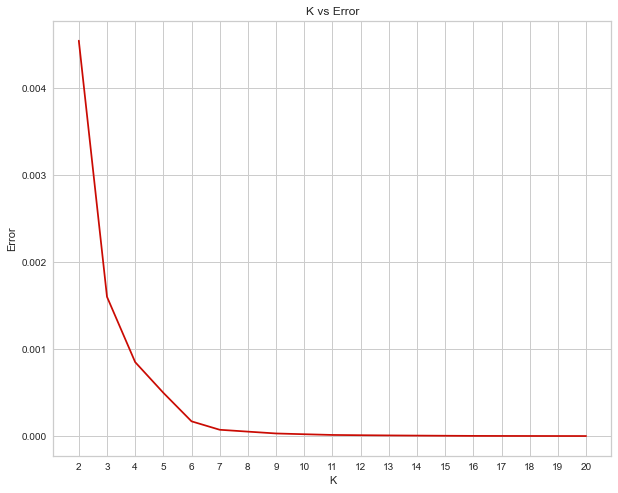

In [ ]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

Then I used a model that accurately pointed out the optimum K value. 
I imported ‘KElbowVisualizer’ from the Yellowbrick package. Then I fit our K-Means model above to the Elbow visualizer.

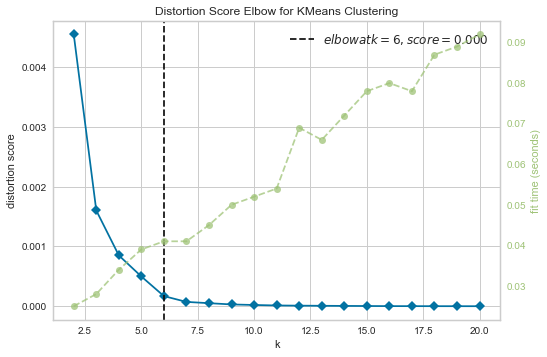

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

I see that the optimum K value is 6 so I will have a resulting of 4 clusters.

In [ ]:
kclusters = 6

bkk_grouped_clustering = som_tum.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bkk_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 2, 2, 0, 5, 3, 3, 0, 3])

In [ ]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
somtum_merged = som_tum.copy()

# add clustering labels
somtum_merged["Cluster Labels"] = kmeans.labels_

somtum_merged.head()

Neighborhood  Som Tum Restaurant  Cluster Labels
0       Bang Bon            0.045455               1
1      Bang Kapi            0.050000               1
2      Bang Khae            0.029412               2
3      Bang Khen            0.026667               2
4  Bang Kho Laem            0.010000               0

In [ ]:
# merge bkk_grouped with bkk_data to add latitude/longitude for each neighborhood
somtum_merged = somtum_merged.join(bkk_venues.set_index("Neighborhood"), on="Neighborhood")

print(somtum_merged.shape)
somtum_merged.head()

(3975, 9)


Neighborhood  Som Tum Restaurant  Cluster Labels  Neighborhood Latitude  \
0     Bang Bon            0.045455               1                13.6592   
0     Bang Bon            0.045455               1                13.6592   
0     Bang Bon            0.045455               1                13.6592   
0     Bang Bon            0.045455               1                13.6592   
0     Bang Bon            0.045455               1                13.6592   

   Neighborhood Longitude                            Venue  Venue Latitude  \
0                100.3991                     ขาหมูบางหว้า       13.657136   
0                100.3991     ร้านต้นไม้ ริมถนนกาญจนาภิเษก       13.654098   
0                100.3991        เจ๊ไน้ ก๋วยเตี๋ยวเป็ดตุ๋น       13.654137   
0                100.3991  Irashaimase Japanese Restaurant       13.658358   
0                100.3991                      TPD Bowling       13.663977   

   Venue Longitude       Venue Category  
0       100.395230      Thai Restaurant  
0       100.405054        Garden Center  
0       100.405323         Noodle House  
0       100.401403  Japanese Restaurant  
0       100.408965        Bowling Alley

In [ ]:
# sort the results by Cluster Labels
print(somtum_merged.shape)
somtum_merged.sort_values(["Cluster Labels"], inplace=True)
somtum_merged

(3975, 9)


Neighborhood  Som Tum Restaurant  Cluster Labels  Neighborhood Latitude  \
49       Yan Nawa            0.012987               0              13.696944   
4   Bang Kho Laem            0.010000               0              13.693333   
4   Bang Kho Laem            0.010000               0              13.693333   
4   Bang Kho Laem            0.010000               0              13.693333   
4   Bang Kho Laem            0.010000               0              13.693333   
..            ...                 ...             ...                    ...   
20  Khlong Sam Wa            0.020000               5              13.859722   
20  Khlong Sam Wa            0.020000               5              13.859722   
20  Khlong Sam Wa            0.020000               5              13.859722   
14     Chom Thong            0.016949               5              13.677222   
32   Phra Khanong            0.020000               5              13.702222   

    Neighborhood Longitude                                  Venue  \
49              100.543056                              Star Mart   
4               100.502500                  Happy Fish (แฮปปีฟิช)   
4               100.502500     Bangkholeam Market (ตลาดบางคอแหลม)   
4               100.502500                  Tree on 3 (ทรีออนทรี)   
4               100.502500                 Starbucks (สตาร์บัคส์)   
..                     ...                                    ...   
20              100.704167  ชายสี่ บะหมี่เกี่๊ยว@หมู่บ้านมโนรมย์4   
20              100.704167               Jungle cruise restaurant   
20              100.704167                   Safari World Bangkok   
14              100.484722          Rest Area Rama II Express Way   
32              100.601667                         Muscle Factory   

    Venue Latitude  Venue Longitude        Venue Category  
49       13.684825       100.547683     Convenience Store  
4        13.705100       100.502237            Steakhouse  
4        13.698014       100.497962        Farmers Market  
4        13.690647       100.504390         Shopping Mall  
4        13.690739       100.504131           Coffee Shop  
..             ...              ...                   ...  
20       13.864805       100.709982          Noodle House  
20       13.867216       100.702910            Restaurant  
20       13.866108       100.702770           Zoo Exhibit  
14       13.675629       100.481946             Rest Area  
32       13.698918       100.599061  Gym / Fitness Center  

[3975 rows x 9 columns]

We see that there are a total of 50 districts of Bangkok with Som Tum restaurants's location.

We will create a new map with the neighborhood and Som Tum Restaurants.

In [ ]:
# create map
map_clusters = folium.Map(location=[lat, long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(somtum_merged['Neighborhood Latitude'], somtum_merged['Neighborhood Longitude'], somtum_merged['Neighborhood'], somtum_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

### 4.5 Analysis of each Cluster

How many Neighborhoods per Cluster?

In [ ]:
df_bkk["Cluster Labels"] = kmeans.labels_
df_bkk.head(20)

District  Postcode  Population   Latitude   Longitude  \
0          Bang Bon     10150      105161  13.659200  100.399100   
1         Bang Kapi     10240      148465  13.765833  100.647778   
2         Bang Khae     10160      191781  13.696111  100.409444   
3         Bang Khen     10220      189539  13.873889  100.596389   
4     Bang Kho Laem     10120       94956  13.693333  100.502500   
5   Bang Khun Thian     10150      165491  13.660833  100.435833   
6           Bang Na     10260       95912  13.680081  100.591800   
7        Bang Phlat     10700       99273  13.793889  100.505000   
8          Bang Rak     10500       45875  13.730833  100.524167   
9          Bang Sue     10800      132234  13.809722  100.537222   
10      Bangkok Noi     10700      117793  13.770867  100.467933   
11      Bangkok Yai     10600       72321  13.722778  100.476389   
12        Bueng Kum     10240      145830  13.785278  100.669167   
13        Chatuchak     10900      160906  13.828611  100.559722   
14       Chom Thong     10150      158005  13.677222  100.484722   
15        Din Daeng     10400      130220  13.769722  100.552778   
16       Don Mueang     10210      166261  13.913611  100.589722   
17            Dusit     10300      107655  13.776944  100.520556   
18      Huai Khwang     10310       78175  13.776667  100.579444   
19      Khan Na Yao     10230       88678  13.827100  100.674300   

    Cluster Labels  
0                1  
1                1  
2                2  
3                2  
4                0  
5                5  
6                3  
7                3  
8                0  
9                3  
10               1  
11               0  
12               2  
13               0  
14               5  
15               5  
16               3  
17               2  
18               2  
19               1

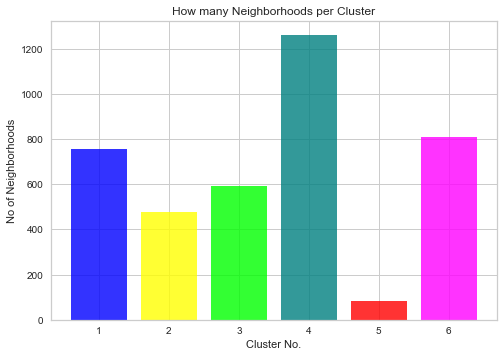

In [ ]:
objects = (1,2,3,4,5,6)
y_pos = np.arange(len(objects))
performance = somtum_merged['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['blue', 'YELLOW','LIME','TEAL','Red','FUCHSIA'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster No.')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [ ]:
somtum_merged.rename(columns={'Neighborhood':'District'},inplace=True)
df_new = df_bkk[['District']]

### Cluster 1

In [ ]:
cluster1 = somtum_merged.loc[somtum_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_new, cluster1, on='District')
df_cluster1


District  Som Tum Restaurant  Cluster Labels  Neighborhood Latitude  \
0    Bang Kho Laem            0.010000               0              13.693333   
1    Bang Kho Laem            0.010000               0              13.693333   
2    Bang Kho Laem            0.010000               0              13.693333   
3    Bang Kho Laem            0.010000               0              13.693333   
4    Bang Kho Laem            0.010000               0              13.693333   
..             ...                 ...             ...                    ...   
750       Yan Nawa            0.012987               0              13.696944   
751       Yan Nawa            0.012987               0              13.696944   
752       Yan Nawa            0.012987               0              13.696944   
753       Yan Nawa            0.012987               0              13.696944   
754       Yan Nawa            0.012987               0              13.696944   

     Neighborhood Longitude  \
0                100.502500   
1                100.502500   
2                100.502500   
3                100.502500   
4                100.502500   
..                      ...   
750              100.543056   
751              100.543056   
752              100.543056   
753              100.543056   
754              100.543056   

                                                 Venue  Venue Latitude  \
0                               เย็นตาโฟ (วัดจันทร์ใน)       13.694552   
1                                  ห้องอาหารจันทร์เพ็ญ       13.692355   
2                           Pad Thai Shop (ร้านผัดไทย)       13.693819   
3                               Starbucks (สตาร์บัคส์)       13.690739   
4                      Baan Klang Krung (บ้านกลางกรุง)       13.690974   
..                                                 ...             ...   
750                               หมูก๋วยเตี๋ยวแปดริ้ว       13.686867   
751  Rama III-Industrial Ring Junction (แยกพระรามที...       13.685742   
752                                 Cafe in a Bookyard       13.684803   
753                                      Shelter@Rama3       13.684778   
754                                          Star Mart       13.684825   

     Venue Longitude     Venue Category  
0         100.504550       Noodle House  
1         100.504234    Thai Restaurant  
2         100.504930       Noodle House  
3         100.504131        Coffee Shop  
4         100.503151    Thai Restaurant  
..               ...                ...  
750       100.536573       Noodle House  
751       100.547858       Intersection  
752       100.544200        Coffee Shop  
753       100.544255        Beer Garden  
754       100.547683  Convenience Store  

[755 rows x 9 columns]

### Cluster 2

In [ ]:
cluster2 = somtum_merged.loc[somtum_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_new, cluster2, on='District')
df_cluster2


District  Som Tum Restaurant  Cluster Labels  Neighborhood Latitude  \
0      Bang Bon            0.045455               1                13.6592   
1      Bang Bon            0.045455               1                13.6592   
2      Bang Bon            0.045455               1                13.6592   
3      Bang Bon            0.045455               1                13.6592   
4      Bang Bon            0.045455               1                13.6592   
..          ...                 ...             ...                    ...   
471  Thung Khru            0.048193               1                13.6472   
472  Thung Khru            0.048193               1                13.6472   
473  Thung Khru            0.048193               1                13.6472   
474  Thung Khru            0.048193               1                13.6472   
475  Thung Khru            0.048193               1                13.6472   

     Neighborhood Longitude                               Venue  \
0                  100.3991                        ขาหมูบางหว้า   
1                  100.3991        ร้านต้นไม้ ริมถนนกาญจนาภิเษก   
2                  100.3991           เจ๊ไน้ ก๋วยเตี๋ยวเป็ดตุ๋น   
3                  100.3991     Irashaimase Japanese Restaurant   
4                  100.3991                         TPD Bowling   
..                      ...                                 ...   
471                100.4958                ห้องอาหารสิระแมนชั่น   
472                100.4958                      Pruksa vill 17   
473                100.4958                        สเต็กลุงหนวด   
474                100.4958                       ผัดไทยย่าเกษร   
475                100.4958  พี่มัย อาหารตามสั่ง @ประชาอุทิศ 29   

     Venue Latitude  Venue Longitude       Venue Category  
0         13.657136       100.395230      Thai Restaurant  
1         13.654098       100.405054        Garden Center  
2         13.654137       100.405323         Noodle House  
3         13.658358       100.401403  Japanese Restaurant  
4         13.663977       100.408965        Bowling Alley  
..              ...              ...                  ...  
471       13.658916       100.499268     Asian Restaurant  
472       13.642638       100.483994      Thai Restaurant  
473       13.659401       100.501167           Steakhouse  
474       13.659335       100.500807                Diner  
475       13.659289       100.501068                Diner  

[476 rows x 9 columns]

### Cluster 3

In [ ]:
cluster3 = somtum_merged.loc[somtum_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_new, cluster3, on='District')
df_cluster3


District  Som Tum Restaurant  Cluster Labels  Neighborhood Latitude  \
0     Bang Khae            0.029412               2              13.696111   
1     Bang Khae            0.029412               2              13.696111   
2     Bang Khae            0.029412               2              13.696111   
3     Bang Khae            0.029412               2              13.696111   
4     Bang Khae            0.029412               2              13.696111   
..          ...                 ...             ...                    ...   
588  Phaya Thai            0.030000               2              13.780000   
589  Phaya Thai            0.030000               2              13.780000   
590  Phaya Thai            0.030000               2              13.780000   
591  Phaya Thai            0.030000               2              13.780000   
592  Phaya Thai            0.030000               2              13.780000   

     Neighborhood Longitude                                        Venue  \
0                100.409444                       Starbucks (สตาร์บัคส์)   
1                100.409444  McDonald's & McCafé (แมคโดนัลด์ & แมคคาเฟ่)   
2                100.409444                  The Explace (ดิ เอ็กซ์เพลส)   
3                100.409444                       ก๋วยเตี๋ยวเนื้อนายอ้วน   
4                100.409444                                      ปฐมโอชา   
..                      ...                                          ...   
588              100.542778              Krua Pradiphat (ครัวประดิพัทธ์)   
589              100.542778                    Ban Mae Yui (บ้านแม่ยุ้ย)   
590              100.542778                       Ban Ya Kaad (บรรยากาศ)   
591              100.542778                              Hub 39 (ฮับ 39)   
592              100.542778                            Shaka Grill & Bar   

     Venue Latitude  Venue Longitude        Venue Category  
0         13.694460       100.408111           Coffee Shop  
1         13.695474       100.407852  Fast Food Restaurant  
2         13.694442       100.407979         Shopping Mall  
3         13.701331       100.407640          Noodle House  
4         13.697163       100.407036          Noodle House  
..              ...              ...                   ...  
588       13.790495       100.544649       Thai Restaurant  
589       13.776387       100.541098       Thai Restaurant  
590       13.789622       100.542020       Thai Restaurant  
591       13.788099       100.541990                  Café  
592       13.779043       100.537912   American Restaurant  

[593 rows x 9 columns]

### Cluster 4

In [ ]:
cluster4 = somtum_merged.loc[somtum_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_new, cluster4, on='District')
df_cluster4


District  Som Tum Restaurant  Cluster Labels  Neighborhood Latitude  \
0      Bang Na                 0.0               3              13.680081   
1      Bang Na                 0.0               3              13.680081   
2      Bang Na                 0.0               3              13.680081   
3      Bang Na                 0.0               3              13.680081   
4      Bang Na                 0.0               3              13.680081   
...        ...                 ...             ...                    ...   
1255  Watthana                 0.0               3              13.742222   
1256  Watthana                 0.0               3              13.742222   
1257  Watthana                 0.0               3              13.742222   
1258  Watthana                 0.0               3              13.742222   
1259  Watthana                 0.0               3              13.742222   

      Neighborhood Longitude  \
0                 100.591800   
1                 100.591800   
2                 100.591800   
3                 100.591800   
4                 100.591800   
...                      ...   
1255              100.585833   
1256              100.585833   
1257              100.585833   
1258              100.585833   
1259              100.585833   

                                                  Venue  Venue Latitude  \
0                                      ข้าวมันไก่โชคชัย       13.676315   
1                             Mr.Chang (ก๋วยเตี๋ยวฉั่ง)       13.675753   
2                                    Bangkok Tree House       13.680336   
3                                            ครัวต้นหอม       13.674818   
4                          Burger King (เบอร์เกอร์ คิง)       13.687423   
...                                                 ...             ...   
1255                                             R-Haan       13.731835   
1256                                        Bangkok Bar       13.732354   
1257  釜飯と原始焼き 北海道レストラン Kamameshi to Genshiyaki Hokka...       13.730392   
1258                                    Hiroshima Pizza       13.737001   
1259                          รส’นิยม Rosniyom J Avenue       13.734361   

      Venue Longitude          Venue Category  
0          100.589899        Asian Restaurant  
1          100.590814            Noodle House  
2          100.585159                   Hotel  
3          100.596762         Thai Restaurant  
4          100.601475    Fast Food Restaurant  
...               ...                     ...  
1255       100.579640         Thai Restaurant  
1256       100.582853                     Bar  
1257       100.588214     Japanese Restaurant  
1258       100.578433  Okonomiyaki Restaurant  
1259       100.581901         Thai Restaurant  

[1260 rows x 9 columns]

### Cluster 5

In [ ]:
cluster5 = somtum_merged.loc[somtum_merged['Cluster Labels'] == 4]
df_cluster5 = pd.merge(df_new, cluster5, on='District')
df_cluster5


District  Som Tum Restaurant  Cluster Labels  Neighborhood Latitude  \
0   Lat Krabang            0.060606               4              13.722317   
1   Lat Krabang            0.060606               4              13.722317   
2   Lat Krabang            0.060606               4              13.722317   
3   Lat Krabang            0.060606               4              13.722317   
4   Lat Krabang            0.060606               4              13.722317   
..          ...                 ...             ...                    ...   
77       Prawet            0.062500               4              13.716944   
78       Prawet            0.062500               4              13.716944   
79       Prawet            0.062500               4              13.716944   
80       Prawet            0.062500               4              13.716944   
81       Prawet            0.062500               4              13.716944   

    Neighborhood Longitude                        Venue  Venue Latitude  \
0               100.759669    พิกุลทองจิ้มจุ่มเมี่ยงปลา       13.721965   
1               100.759669         Alchemist Coffee Bar       13.721708   
2               100.759669     คูณสิน เป็ดย่างอบน้ำผึ้ง       13.722463   
3               100.759669                Catch Up Cafe       13.723288   
4               100.759669                    เม้งโภชนา       13.721365   
..                     ...                          ...             ...   
77              100.694444                   ครัวมุมสวน       13.710164   
78              100.694444              ร้านบะหมี่นาย A       13.715348   
79              100.694444             Tumlaii (ตำหลาย)       13.711027   
80              100.694444  ก๋วยเตี๋ยวเรืออยุธยา ประเวศ       13.714058   
81              100.694444                   Zee Coffee       13.721549   

    Venue Longitude      Venue Category  
0        100.761559  Som Tum Restaurant  
1        100.760386                Café  
2        100.752902     Thai Restaurant  
3        100.753606                Café  
4        100.757501    Asian Restaurant  
..              ...                 ...  
77       100.693261     Thai Restaurant  
78       100.696114        Noodle House  
79       100.704770  Som Tum Restaurant  
80       100.694927        Noodle House  
81       100.681906                Café  

[82 rows x 9 columns]

### Cluster 6

In [ ]:
cluster6 = somtum_merged.loc[somtum_merged['Cluster Labels'] == 5]
df_cluster6 = pd.merge(df_new, cluster6, on='District')
df_cluster6

District  Som Tum Restaurant  Cluster Labels  \
0    Bang Khun Thian                0.02               5   
1    Bang Khun Thian                0.02               5   
2    Bang Khun Thian                0.02               5   
3    Bang Khun Thian                0.02               5   
4    Bang Khun Thian                0.02               5   
..               ...                 ...             ...   
804      Ratchathewi                0.02               5   
805      Ratchathewi                0.02               5   
806      Ratchathewi                0.02               5   
807      Ratchathewi                0.02               5   
808      Ratchathewi                0.02               5   

     Neighborhood Latitude  Neighborhood Longitude  \
0                13.660833              100.435833   
1                13.660833              100.435833   
2                13.660833              100.435833   
3                13.660833              100.435833   
4                13.660833              100.435833   
..                     ...                     ...   
804              13.758889              100.534444   
805              13.758889              100.534444   
806              13.758889              100.534444   
807              13.758889              100.534444   
808              13.758889              100.534444   

                                            Venue  Venue Latitude  \
0                          ขนมจีนเทวดา บีบเส้นสดๆ       13.659428   
1                                     ไผ่ทองโภชนา       13.662101   
2                   Tops Market (ท็อปส์ มาร์เก็ต)       13.662781   
3                         After You (อาฟเตอร์ ยู)       13.663298   
4         Starbucks Reserve (สตาร์บัคส์ รีเสิร์ฟ)       13.663825   
..                                            ...             ...   
804                      Novotel Bangkok Platinum       13.749881   
805                            ลุงใหญ่ อาหารอีสาน       13.763330   
806              BonChon Chicken (บอนชอน ชิคเก้น)       13.746168   
807                 centralwOrld (เซ็นทรัลเวิลด์)       13.746645   
808  Isetan Supermarket (อิเซตัน ซูเปอร์มาร์เก็ต)       13.747577   

     Venue Longitude       Venue Category  
0         100.433692         Noodle House  
1         100.435264      Thai Restaurant  
2         100.437410          Supermarket  
3         100.437247         Dessert Shop  
4         100.437668          Coffee Shop  
..               ...                  ...  
804       100.540307                Hotel  
805       100.546165   Som Tum Restaurant  
806       100.532811  Fried Chicken Joint  
807       100.539530        Shopping Mall  
808       100.539730          Supermarket  

[809 rows x 9 columns]

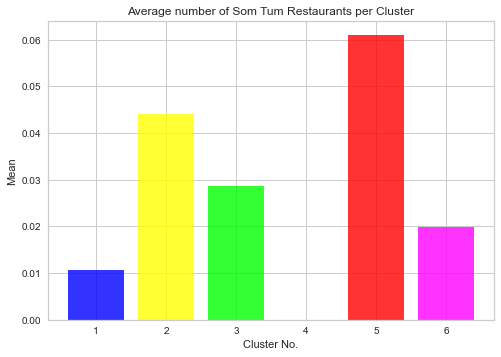

In [ ]:
clusters_mean = [df_cluster1['Som Tum Restaurant'].mean(),df_cluster2['Som Tum Restaurant'].mean(),df_cluster3['Som Tum Restaurant'].mean(),
                 df_cluster4['Som Tum Restaurant'].mean(),df_cluster5['Som Tum Restaurant'].mean(),df_cluster6['Som Tum Restaurant'].mean()]
objects = (1,2,3,4,5,6)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['blue', 'YELLOW','LIME','TEAL','Red','FUCHSIA'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster No.')
plt.title('Average number of Som Tum Restaurants per Cluster')

plt.show()

# 6. Conclusion

Most of the Som tum Restaurants are in cluster 5 represented by the red clusters but In cluster 4 there is little to no Som tum Restaurant.

You can look for nearby venues, the optimum place to put a new Som tum Restaurant there are many neighborhoods in the area that little to no Som tum Restaurants.

Eliminating any competition. The second best Neighborhoods that have a great opportunity would be in areas such as Samphanthawong, Watthana, Khlong San, etc.

Which is in Cluster 4. Having 1,260 neighborhoods in the area with no Som tum Restaurants. That gives a good opportunity for opening up a new restaurant. 

This concludes the optimal findings for this project and recommends the entrepreneur to open a Som tum restaurant in these locations with little to no competition. 

Nonetheless, if the food is authentic, affordable, and good taste, I am confident that it will have a great following everywhere.

reference
1. List of districts of Bangkok (https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok)

2. https://www.forbes.com/sites/alexandratalty/2019/09/04/bangkok-is-the-most-visited-city-in-the-world-again/#48f945ee5f1b


3. https://th.wikipedia.org/wiki/%E0%B8%AA%E0%B9%89%E0%B8%A1%E0%B8%95%E0%B8%B3
